In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
from config import Essex_Shape_Config, Web_Scrape_Config
from clean_job_data import job_data_w_geog
from scipy import stats

# Get Job Scrape Data
Job scrape data is from indeed, number of pages parameters have been restricted

In [3]:
# Print list, manually change list and change code to append data that has been blocked
gdf = job_data_w_geog()
print(gdf.shape)
gdf.head()

(36413, 18)


,search_term,job_title,wage,wage_freq,company,location,desc,FID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,Basildon,Warehouse Operative FTC (Fixed Term Contract) ...,10.5,hour,Amazon,Tilbury,"As part of our team, you will help us continue...",93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
1,Basildon,Dog walking,NaN,NaN,Mrs Paws,Billericay,You must have a full UK driving licence with n...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
2,Basildon,Office Administrator/PA,21000.0,year,BDM,Wickford,Be able to work alone and manage queries from ...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
3,Basildon,Warehouse Operative,30000.0,year,TW ROAD HAULAGE,NaN,Monday - Friday plus Saturdays hours to be dis...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
4,Basildon,"Customer Assistant, 11 to 20 hours, Laindon",10.1,hour,Lidl,NaN,You’ll put in a shift as part of the team to c...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."


# Wage

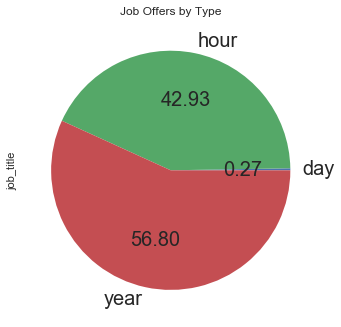

In [4]:
matplotlib.style.use("seaborn")
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams['font.size'] = 20

gdf.wage_freq.fillna("N/A")
ax = gdf.groupby('wage_freq').count().job_title.plot(kind='pie', autopct='%.2f').set_title("Job Offers by Type")
ax.figure.savefig('file.png', transparent=True)

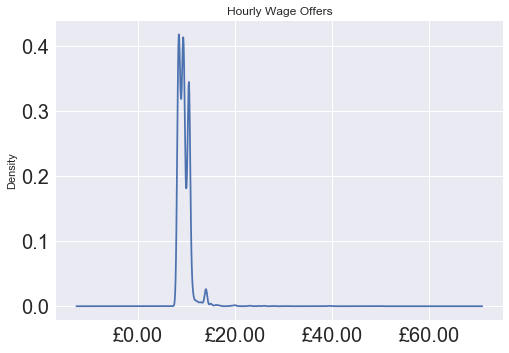

In [5]:
gdf_hour = gdf[gdf.wage_freq.eq("hour")]
ax = gdf_hour.wage.plot.kde()
ax.set_title("Hourly Wage Offers")
#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.2f')
ax.xaxis.set_major_formatter(formatter)

ax.figure.savefig('file.png', transparent=True)


In [6]:
# gdf_hour.loc[(gdf_hour['wage'] ==50)]
stats.describe(gdf_hour.wage)

DescribeResult(nobs=9170, minmax=(8.21, 50.0), mean=9.571066521264996, variance=2.632051736222274, skewness=7.4350883276918704, kurtosis=114.72662981519574)

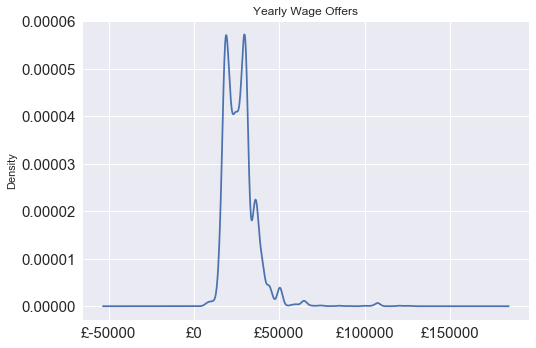

In [7]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams['font.size'] = 20

gdf_year = gdf[gdf.wage_freq.eq("year")]
ax = gdf_year.wage.plot.kde()
ax.set_title("Yearly Wage Offers")
#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.0f')
ax.xaxis.set_major_formatter(formatter)

ax.figure.savefig('file.png', transparent=True)


In [8]:
gdf_year.loc[(gdf_year['wage'] ==6080.0)]
# stats.describe(gdf_year.wage)

,search_term,job_title,wage,wage_freq,company,location,desc,FID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
4451,Braintree,Part Time Minibus Driver,6080.0,year,Felsted School,NaN,Due to the size and weight of the Schools’ min...,94,E07000067,Braintree,None,577253,227335,0.575911,51.9163,1.607073e+09,273423.537132,"POLYGON ((0.78147 51.96651, 0.78179 51.96635, ..."


# Employer

In [9]:
unique_jobs_df = gdf[['job_title','wage', "wage_freq", "company", "location", "desc"]]
unique_jobs_df.drop_duplicates(keep="first", inplace=True)
gdf.shape

/Users/ysohoye/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(36413, 18)

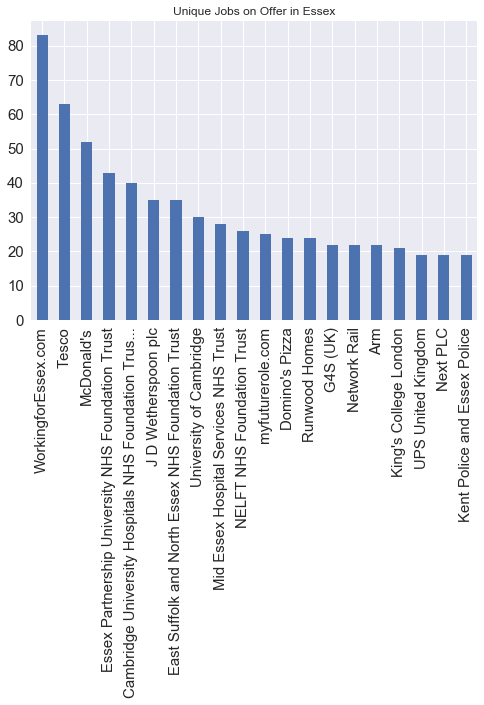

In [10]:

comp_freq = unique_jobs_df.company.value_counts()
tip_comp_freq = comp_freq.nlargest(20)
ax = tip_comp_freq.plot.bar()
ax.set_title("Unique Jobs on Offer in Essex")

ax.figure.savefig('file.png', transparent=True, bbox_inches = "tight")


## Kepler

In [ ]:
from keplergl import KeplerGl
map_1 = KeplerGl()

In [ ]:
shape_gdf = gpd.read_file(Essex_Shape_Config.LAU_SHP_FILE)
shape_gdf.replace({'LAD19NM': {"Epping Forest": "Epping"}}, inplace = True) #epping is shortened in scraping

In [ ]:
mean_df_hour = gdf_hour.groupby('search_term').mean()
mean_df_hour = mean_df_hour.reset_index()
mean_df_hour_merge = pd.merge(mean_df_hour,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
mean_df_hour_merge = gpd.GeoDataFrame(mean_df_hour_merge)
mean_df_hour_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)

In [ ]:
mean_df_year = gdf_year.groupby('search_term').mean()
mean_df_year = mean_df_year.reset_index()
mean_df_year_merge = pd.merge(mean_df_year,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
mean_df_year_merge = gpd.GeoDataFrame(mean_df_year_merge)
mean_df_year_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)

In [ ]:
freq_df = gdf.groupby('search_term').count()
freq_df = freq_df.reset_index()
freq_df_merge = pd.merge(freq_df,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
freq_df_merge = gpd.GeoDataFrame(freq_df_merge)
freq_df_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)

In [ ]:
map_1.add_data(data=freq_df_merge, name='Jobs_Freq_count')
map_1.add_data(data=mean_df_year_merge, name='Jobs_Year_Average')
map_1.add_data(data=mean_df_hour_merge, name='Jobs_Hour_Average')

In [ ]:
from datetime import datetime, date
date ="{:%Y_%m_%d}".format(datetime.now())

# map_1
map_1.save_to_html(file_name=f'output/esx_job_{date}.html')

# House Price Data

In [17]:
df = pd.read_csv("web_data/zoopla_dump_master.csv")
df

,Unnamed: 0,country_code,num_floors,image_150_113_url,listing_status,num_bedrooms,location_is_approximate,image_50_38_url,latitude,furnished_state,...,street_name,num_bathrooms,agent_logo,agent_phone,image_354_255_url,image_url,last_published_date,letting_fees,floor_area,new_home
0,0,gb,0,https://lid.zoocdn.com/150/113/fb7ab690fc097c2...,sale,5,0,https://lid.zoocdn.com/50/38/fb7ab690fc097c2a5...,51.634224,NaN,...,Aspen House,6,https://st.zoocdn.com/zoopla_static_agent_logo...,020 8022 0282,https://lid.zoocdn.com/354/255/fb7ab690fc097c2...,https://lid.zoocdn.com/354/255/fb7ab690fc097c2...,27/02/2020 12:22,NaN,NaN,NaN
1,1,gb,0,https://lid.zoocdn.com/150/113/ef9015edaa3aafe...,sale,0,0,https://lid.zoocdn.com/50/38/ef9015edaa3aafe61...,51.851740,NaN,...,Frinton Road,0,https://st.zoocdn.com/zoopla_static_agent_logo...,01245 679995,https://lid.zoocdn.com/354/255/ef9015edaa3aafe...,https://lid.zoocdn.com/354/255/ef9015edaa3aafe...,08/10/2019 13:09,NaN,NaN,NaN
2,2,gb,0,https://lid.zoocdn.com/150/113/ca0f2d665638ed8...,sale,9,0,https://lid.zoocdn.com/50/38/ca0f2d665638ed831...,51.635094,NaN,...,High Road,5,https://st.zoocdn.com/zoopla_static_agent_logo...,020 8115 0139,https://lid.zoocdn.com/354/255/ca0f2d665638ed8...,https://lid.zoocdn.com/354/255/ca0f2d665638ed8...,22/11/2019 11:35,"At Madison Fox, being open and transparent is ...",NaN,NaN
3,3,gb,0,https://lid.zoocdn.com/150/113/933ff9b0dfeba24...,sale,7,0,https://lid.zoocdn.com/50/38/933ff9b0dfeba2488...,51.789455,NaN,...,31 Colchester Road,7,https://st.zoocdn.com/zoopla_static_agent_logo...,020 8115 0139,https://lid.zoocdn.com/354/255/933ff9b0dfeba24...,https://lid.zoocdn.com/354/255/933ff9b0dfeba24...,21/10/2019 12:14,"At Madison Fox, being open and transparent is ...",NaN,NaN
4,4,gb,0,https://lid.zoocdn.com/150/113/285831cfde4c0b4...,sale,10,0,https://lid.zoocdn.com/50/38/285831cfde4c0b4eb...,51.569954,NaN,...,Parkstone Avenue Hornchurch,0,https://st.zoocdn.com/zoopla_static_agent_logo...,0333 016 5458,https://lid.zoocdn.com/354/255/285831cfde4c0b4...,https://lid.zoocdn.com/354/255/285831cfde4c0b4...,04/03/2020 20:08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,95,gb,0,https://lid.zoocdn.com/150/113/b55c301f2014925...,sale,5,0,https://lid.zoocdn.com/50/38/b55c301f20149259f...,51.645410,NaN,...,Loughton Essex,0,https://st.zoocdn.com/zoopla_static_agent_logo...,020 8022 3378,https://lid.zoocdn.com/354/255/b55c301f2014925...,https://lid.zoocdn.com/354/255/b55c301f2014925...,02/03/2020 20:13,NaN,NaN,NaN
26996,96,gb,0,https://lid.zoocdn.com/150/113/f95c009c8f3af86...,sale,6,0,https://lid.zoocdn.com/50/38/f95c009c8f3af8614...,51.529380,NaN,...,Thorpe Bay Gardens,2,https://st.zoocdn.com/zoopla_static_agent_logo...,01702 787993,https://lid.zoocdn.com/354/255/f95c009c8f3af86...,https://lid.zoocdn.com/354/255/f95c009c8f3af86...,04/01/2020 4:07,NaN,NaN,NaN
26997,97,gb,0,https://lid.zoocdn.com/150/113/c899f51487dd505...,sale,4,0,https://lid.zoocdn.com/50/38/c899f51487dd505e8...,51.740032,NaN,...,Epping Green Road,4,https://st.zoocdn.com/zoopla_static_agent_logo...,01992 800083,https://lid.zoocdn.com/354/255/c899f51487dd505...,https://lid.zoocdn.com/354/255/c899f51487dd505...,14/02/2020 17:33,NaN,NaN,NaN
26998,98,gb,0,https://lid.zoocdn.com/150/113/8d1d8bb879ba6cf...,sale,5,0,https://lid.zoocdn.com/50/38/8d1d8bb879ba6cf5e...,51.898697,NaN,...,Rectory Road,3,https://st.zoocdn.com/zoopla_static_agent_logo...,01245 845818,https://lid.zoocdn.com/354/255/8d1d8bb879ba6cf...,https://lid.zoocdn.com/354/255/8d1d8bb879ba6cf...,02/03/2020 20:25,NaN,NaN,NaN


In [12]:
keep_cols = ['listing_status', 'num_bedrooms', "post_town", "price_modifier","latitude", "longitude"]
clean_df = df[keep_cols]
clean_df

,listing_status,num_bedrooms,post_town,price_modifier,latitude,longitude
0,sale,5,Chigwell,price_on_request,51.634224,0.111536
1,sale,0,Clacton-on-Sea,offers_in_region_of,51.851740,1.168926
2,sale,9,Chigwell,NaN,51.635094,0.085635
3,sale,7,Maldon,NaN,51.789455,0.709804
4,sale,10,Hornchurch,price_on_request,51.569954,0.227771
...,...,...,...,...,...,...
26995,sale,5,Loughton,NaN,51.645410,0.048804
26996,sale,6,Southend-on-Sea,offers_over,51.529380,0.758580
26997,sale,4,Epping,NaN,51.740032,0.074562
26998,sale,5,Braintree,guide_price,51.898697,0.611302


In [16]:
ax = clean_df.groupby('listing_status').count()#.job_title.plot(kind='pie', autopct='%.2f').set_title("Job Offers by Type")
# ax.figure.savefig('file.png', transparent=True)

ax

,num_bedrooms,post_town,price_modifier,latitude,longitude
listing_status,,,,,
sale,27000,27000,16470,27000,27000


In [ ]:
ax = df.post_town.value_counts().plot.bar()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
ax = df.groupby('post_town').mean().price.plot.bar()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# TODO map house price, differenteate between rent and sale